# Import

In [1]:
import numpy as np
import pandas as pd
import sklearn
from random import choice

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
df = pd.read_csv('gdrive/Shareddrives/CS5644 ML with Big Data/listings_detail.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (43,61,62,95) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.shape

(28452, 106)

In [5]:
df.head()

id  ... reviews_per_month
0   44054  ...              0.85
1  100213  ...              0.10
2  128496  ...              2.70
3  161902  ...              0.28
4  162144  ...              0.40

[5 rows x 106 columns]

In [6]:
df.describe()

id  ...  reviews_per_month
count  2.845200e+04  ...       17294.000000
mean   2.628583e+07  ...           1.319757
std    6.403312e+06  ...           1.581243
min    4.405400e+04  ...           0.010000
25%    2.245616e+07  ...           0.290000
50%    2.787765e+07  ...           0.800000
75%    3.134482e+07  ...           1.750000
max    3.395441e+07  ...          20.000000

[8 rows x 45 columns]

# Expand

In [7]:
# hold dataframe values
choice_list= []

In [8]:
# put all the column names in the list in order to iterate
colnames = df.columns.values
# print(colnames)
dfnew = df

In [9]:
for i in range(0,len(colnames)):
    column_name=colnames[i]
#     print(column_name)
    valueslist=df[column_name].tolist()
    for _ in range(71548):
        selection = choice(valueslist)
        choice_list.append(selection)

In [10]:
dfnew[column_name]= pd.DataFrame(choice_list, columns=[column_name])
# print(dfnew[column_name])
choice_list.clear()

In [11]:
def expandData(times,dforiginal,colnames):
    for time in range(0,times):
        for i in range(4,len(colnames)):
            namee=colnames[i]
#             print(namee)
            valueslist=dforiginal[namee].tolist()
            for _ in range(100000):
                selection = choice(valueslist)
                choice_list.append(selection)
            dfnew[namee]= pd.DataFrame(choice_list, columns=[namee])
#             print(dfnew[namee])
            choice_list.clear()
        dfnew2 = dforiginal.append(dfnew, ignore_index=True)
        colnames = dfnew2.columns.values
        dforiginal = dfnew2
    return dfnew2

In [12]:
# df=dfmerge2
df=expandData(6,df,colnames)

In [13]:
df.describe()

id  ...  reviews_per_month
count  1.991640e+05  ...       1.991640e+05
mean   2.628583e+07  ...       2.632684e+07
std    6.403216e+06  ...       6.380409e+06
min    4.405400e+04  ...       1.284960e+05
25%    2.245616e+07  ...       2.244068e+07
50%    2.787765e+07  ...       2.795077e+07
75%    3.134482e+07  ...       3.136876e+07
max    3.395441e+07  ...       3.395054e+07

[8 rows x 45 columns]

In [14]:
df.shape

(199164, 106)

In [15]:
print(df.to_csv("expanded.csv", encoding='utf-8', index=False))

None


In [ ]:
df.head()

id  ... reviews_per_month
0   44054  ...          20722688
1  100213  ...          32248499
2  128496  ...          33256159
3  161902  ...          23129902
4  162144  ...          30726994

[5 rows x 106 columns]

# Pre-process

In [ ]:
df.drop(["id","listing_url","scrape_id","last_scraped","name","space","description","experiences_offered","notes","access","thumbnail_url","medium_url","xl_picture_url","host_id","host_name","host_acceptance_rate","host_thumbnail_url","host_neighbourhood","host_listings_count","host_verifications","street","neighbourhood","neighbourhood_group_cleansed"
         ,"city","state","zipcode","smart_location","country_code","country","latitude","longitude","minimum_minimum_nights"
        ,"maximum_minimum_nights","minimum_maximum_nights","maximum_maximum_nights","calendar_last_scraped"
        ,"license","jurisdiction_names",],axis=1,inplace=True)


In [ ]:
def getAmenitiesLabels(amenities):
    all_amenities=set()
    for x in amenities:
        x=x.strip("}")
        x=x.strip("{")
        x=x.replace('"','')
        x=x.split(",")
        x=set(x)
        all_amenities=all_amenities.union(x)

    all_amenities.remove('')
    all_amenities.remove('translation missing: en.hosting_amenity_49')
    all_amenities.remove('translation missing: en.hosting_amenity_50')
    return all_amenities

def getAllAmenities(amenities):
    amenities_list = []
    for x in amenities:
        x=x.strip("}")
        x=x.strip("{")
        x=x.replace('"','')
        x=x.split(",")
        x=set(x)
        amenities_list.append(x) 
    return amenities_list

def parseAmenitiesIntoColumns():
    amenities_label = getAmenitiesLabels(df["amenities"].unique())
    amenities_list = getAllAmenities(df["amenities"])
    for j in range(len(df)):
        for i in list(amenities_label):
            if i in amenities_list[j]:
                df.at[j, i]=1
            else:
                df.at[j, i]=0
    df.drop(["amenities"],axis=1,inplace=True)

In [ ]:
# summary - hasDescription [1,0]
df.loc[df["summary"].notna(),"summary"]=1
df["summary"].fillna(0,inplace=True)

# neighborhood_overview - hasNeighborhoodOverview [1,0]
df.loc[df["neighborhood_overview"].notna(),"neighborhood_overview"]=1
df["neighborhood_overview"].fillna(0,inplace=True)

# transit - hasTransitTips [1,0]
df.loc[df["transit"].notna(),"transit"]=1
df["transit"].fillna(0,inplace=True)

# interaction - hasInteractionWithCustomers [1,0]
df.loc[df["interaction"].notna(),"interaction"]=1
df["interaction"].fillna(0,inplace=True)

# house_rules - hasHouseRules [1,0]
df.loc[df["house_rules"].notna(),"house_rules"]=1
df["house_rules"].fillna(0,inplace=True)

# picture_url - hasHousePicture [1,0]
df.loc[df["picture_url"].notna(),"picture_url"]=1
df["picture_url"].fillna(0,inplace=True)

# host_url - hasHostHomePage [1,0]
df.loc[df["host_url"].notna(),"host_url"]=1
df["host_url"].fillna(0,inplace=True)

# host_since daysDiff- min 923,max 4099
df["host_since"]=((pd.to_datetime('today')-pd.to_datetime(df["host_since"]))/pd.Timedelta(1, 'D')).fillna(0).astype(int)

# host_location - whereHostCurrentlyAt Beijing[1] outsideBeijing[0]
df.loc[df["host_location"].str.contains("Beijing",na=False),"host_location"]=1
df.loc[df["host_location"]!=1,"host_location"]=0

# host_about - hasHostDescription [1,0]
df.loc[df["host_about"].notna(),"host_about"]=1
df["host_about"].fillna(0,inplace=True)

# host_response_time - within an hour[0], within a few hours[1], within a day[2], a few days or more[3] NA[4]
df.loc[df["host_response_time"]=="within an hour","host_response_time"]=0
df.loc[df["host_response_time"]=="within a few hours","host_response_time"]=1
df.loc[df["host_response_time"]=="within a day","host_response_time"]=2
df.loc[df["host_response_time"]=="a few days or more","host_response_time"]=3
df["host_response_time"].fillna(4,inplace=True)

# host_response_rate - >90[0] 50～90[1] 0~50[2] 0[3]
df['host_response_rate']=df['host_response_rate'].str.strip('%').astype(float)
df=pd.DataFrame(df)
df["host_response_rate"].fillna(np.mean(df["host_response_rate"]),inplace=True)
place=df.host_response_rate
df.loc[place>90.00,"host_response_rate"]=0
df.loc[(place<=90.00) & (place>50.00),"host_response_rate"]=1
df.loc[(place<=50.00) & (place>0.00),"host_response_rate"]=2
df.loc[(place==0.00),"host_response_rate"]=3
df=pd.DataFrame(df)

# host_is_superhost 
# host_picture_url - hasHostPicture [1,0]
df.loc[df["host_picture_url"].notna(),"host_picture_url"]=1
df["host_picture_url"].fillna(0,inplace=True)
# host_total_listings_count
# host_has_profile_pic
# host_identity_verified
# neighbourhood_cleansed - neighbourhood  朝阳区 / Chaoyang[0] 东城区[1]  海淀区[2]  丰台区 / Fengtai[3] 西城区[4] 
                                          # 通州区 / Tongzhou[5] 昌平区[6]  密云县 / Miyun[7]  顺义区 / Shunyi[8]
                                          # 怀柔区 / Huairou [9] 大兴区 / Daxing[10] 延庆县 / Yanqing[11] 
                                          # 石景山区/门头沟区 / Mentougou/平谷区 / Pinggu--Other[12]
df.loc[df["neighbourhood_cleansed"]=="朝阳区 / Chaoyang","neighbourhood_cleansed"]=0
df.loc[df["neighbourhood_cleansed"]=="东城区","neighbourhood_cleansed"]=1
df.loc[df["neighbourhood_cleansed"]=="海淀区","neighbourhood_cleansed"]=2
df.loc[df["neighbourhood_cleansed"]=="丰台区 / Fengtai","neighbourhood_cleansed"]=3
df.loc[df["neighbourhood_cleansed"]=="西城区","neighbourhood_cleansed"]=4
df.loc[df["neighbourhood_cleansed"]=="通州区 / Tongzhou","neighbourhood_cleansed"]=5
df.loc[df["neighbourhood_cleansed"]=="昌平区","neighbourhood_cleansed"]=6
df.loc[df["neighbourhood_cleansed"]=="密云县 / Miyun","neighbourhood_cleansed"]=7
df.loc[df["neighbourhood_cleansed"]=="顺义区 / Shunyi","neighbourhood_cleansed"]=8
df.loc[df["neighbourhood_cleansed"]=="怀柔区 / Huairou","neighbourhood_cleansed"]=9
df.loc[df["neighbourhood_cleansed"]=="大兴区 / Daxing","neighbourhood_cleansed"]=10
df.loc[df["neighbourhood_cleansed"]=="延庆县 / Yanqing","neighbourhood_cleansed"]=11
df.loc[df["neighbourhood_cleansed"]=="房山区","neighbourhood_cleansed"]=12
df.loc[df["neighbourhood_cleansed"]=="石景山区","neighbourhood_cleansed"]=13
df.loc[df["neighbourhood_cleansed"]=="门头沟区 / Mentougou","neighbourhood_cleansed"]=13
df.loc[df["neighbourhood_cleansed"]=="平谷区 / Pinggu","neighbourhood_cleansed"]=13

# market - Beijing[1] Other(International)[0]
df.loc[df["market"]=="Beijing","market"]=1
df.loc[df["market"]!=1,"market"]=0

# is_location_exact
# property_type Apartment[0] House[1] Condominium[2] Loft[3] Serviced apartment[4]  other---5
df.loc[df["property_type"]=="Apartment","property_type"]=0
df.loc[df["property_type"]=="House","property_type"]=1
df.loc[df["property_type"]=="Condominium","property_type"]=2
df.loc[df["property_type"]=="Loft","property_type"]=3
df.loc[df["property_type"]=="Serviced apartment","property_type"]=4
x=df["property_type"]
df.loc[((x!=0) & (x!=1) & (x!=2) & (x!=3) & (x!=4)),"property_type"]=5

# room_type Entire home/apt[0] Private room[1] Shared room[2]
df.loc[df["room_type"]=="Entire home/apt","room_type"]=0
df.loc[df["room_type"]=="Private room","room_type"]=1
df.loc[df["room_type"]=="Shared room","room_type"]=2

# accommodates
# bathrooms
# bedrooms
# beds
# bed_type Real Bed[0] Pull-out Sofa/Futon[1] airbed/couch[2]
df.loc[df["bed_type"]=="Real Bed","bed_type"]=0
df.loc[df["bed_type"]=="Pull-out Sofa","bed_type"]=1
df.loc[df["bed_type"]=="Futon","bed_type"]=1
df.loc[df["bed_type"]=="Airbed","bed_type"]=2
df.loc[df["bed_type"]=="Couch","bed_type"]=2
# amenities see below
parseAmenitiesIntoColumns()
# square_feet 
# price TARGET
df["price"]=df["price"].str.replace(',','')
df["price"]=df["price"].str.strip('$').astype(float)
df["price"].fillna(np.mean(df["price"]),inplace=True)
# weekly_price - hasWeeklyPrice[1,0]
df.loc[df["weekly_price"].notna(),"weekly_price"]=1
df["weekly_price"].fillna(0,inplace=True)
# monthly_price - hasMonthlyPrice[1,0]
df.loc[df["monthly_price"].notna(),"monthly_price"]=1
df["monthly_price"].fillna(0,inplace=True)
# security_deposit
df["security_deposit"]=df["security_deposit"].str.replace(',','')
df['security_deposit']=df['security_deposit'].str.strip('$').astype(float)
df["security_deposit"].fillna(np.mean(df["security_deposit"]),inplace=True)
# cleaning_fee 
df["cleaning_fee"]=df["cleaning_fee"].str.replace(',','')
df['cleaning_fee']=df['cleaning_fee'].str.strip('$').astype(float)
df["cleaning_fee"].fillna(np.mean(df["cleaning_fee"]),inplace=True)
# guests_included
# extra_people
df["extra_people"]=df["extra_people"].str.replace(',','')
df['extra_people']=df['extra_people'].str.strip('$').astype(float)
df["extra_people"].fillna(np.mean(df["extra_people"]),inplace=True)
# minimum_nights
# maximum_nights
# minimum_nights_avg_ntm
# maximum_nights_avg_ntm
# calendar_updated today[0] yesterday[1] 2 days ago/3 days ago/4 days ago/5 days ago/6 days ago[2] 
      #2 weeks ago/3 weeks ago/4 weeks ago[3]  other-[4]
df.loc[df["calendar_updated"]=="today","calendar_updated"]=0
df.loc[df["calendar_updated"]=="yesterday","calendar_updated"]=1
df.loc[df["calendar_updated"].str.contains("day",na=False),"calendar_updated"]=2
df.loc[df["calendar_updated"].str.contains("week",na=False),"calendar_updated"]=3
df.loc[df["calendar_updated"].str.contains("month",na=False),"calendar_updated"]=4
df.loc[df["calendar_updated"].str.contains("never",na=False),"calendar_updated"]=4
# has_availability
# availability_30
# availability_60
# availability_90
# availability_365
# number_of_reviews
# number_of_reviews_ltm
# first_review 
df["first_review"]=((pd.to_datetime('today')-pd.to_datetime(df["first_review"]))/pd.Timedelta(1, 'D')).fillna(0).astype(int)
# last_review 
df["last_review"]=((pd.to_datetime('today')-pd.to_datetime(df["last_review"]))/pd.Timedelta(1, 'D')).fillna(0).astype(int)
# review_scores_rating
# review_scores_accuracy
# review_scores_cleanliness
# review_scores_checkin
# review_scores_communication
# review_scores_location N/A-mean
# review_scores_value.  N/A-mean
# requires_license
# instant_bookable
# is_business_travel_ready
# cancellation_policy  flexible[0] moderate[1] strict_14_with_grace_period[2]
df.loc[df["cancellation_policy"]=="flexible","cancellation_policy"]=0
df.loc[df["cancellation_policy"]=="moderate","cancellation_policy"]=1
df.loc[df["cancellation_policy"]=="strict_14_with_grace_period","cancellation_policy"]=2
# require_guest_profile_picture
# require_guest_phone_verification
# calculated_host_listings_count
# calculated_host_listings_count_entire_homes
# calculated_host_listings_count_private_rooms
# calculated_host_listings_count_shared_rooms
# reviews_per_month N/A-mean

df.replace(np.nan, df.describe().loc["mean",:],inplace=True)
for y in df.columns:
    df.loc[df[y]=="f",y]=0
    df.loc[df[y]=="t",y]=1

# change them all into numeric
df=df.apply(pd.to_numeric, errors='ignore')

In [ ]:
df["review_scores_rating"].unique()

array([ 95.05563371,  98.        ,  97.        , 100.        ,
        60.        ,  93.        ,  95.        ,  20.        ,
        90.        ,  99.        ,  80.        ,  96.        ,
        70.        ,  88.        ,  92.        ,  91.        ,
        94.        ,  87.        ,  73.        ,  84.        ,
        83.        ,  74.        ,  89.        ,  85.        ,
        76.        ,  82.        ,  40.        ,  67.        ,
        86.        ,  77.        ,  75.        ,  78.        ,
        65.        ,  53.        ,  50.        ,  68.        ,
        81.        ,  64.        ,  55.        ,  47.        ,
        30.        ])

In [ ]:
df.shape

(199164, 238)

In [ ]:
df.describe()

summary  neighborhood_overview  ...    Mini fridge         Washer
count  199164.000000          199164.000000  ...  199164.000000  199164.000000
mean        0.895463               0.636440  ...       0.001250       0.888695
std         0.305957               0.481025  ...       0.035337       0.314511
min         0.000000               0.000000  ...       0.000000       0.000000
25%         1.000000               0.000000  ...       0.000000       1.000000
50%         1.000000               1.000000  ...       0.000000       1.000000
75%         1.000000               1.000000  ...       0.000000       1.000000
max         1.000000               1.000000  ...       1.000000       1.000000

[8 rows x 238 columns]

# Pearson Correlation & Data Visualization

In [ ]:
y = df["review_scores_rating"]
X = df.drop(["review_scores_value"], axis=1)

In [ ]:
y.unique()

array([ 95.05563371,  98.        ,  97.        , 100.        ,
        60.        ,  93.        ,  95.        ,  20.        ,
        90.        ,  99.        ,  80.        ,  96.        ,
        70.        ,  88.        ,  92.        ,  91.        ,
        94.        ,  87.        ,  73.        ,  84.        ,
        83.        ,  74.        ,  89.        ,  85.        ,
        76.        ,  82.        ,  40.        ,  67.        ,
        86.        ,  77.        ,  75.        ,  78.        ,
        65.        ,  53.        ,  50.        ,  68.        ,
        81.        ,  64.        ,  55.        ,  47.        ,
        30.        ])

In [ ]:
# correlation
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.corr()

summary  neighborhood_overview  \
summary                                       1.000000               0.002207   
neighborhood_overview                         0.002207               1.000000   
transit                                       0.001057              -0.000708   
interaction                                   0.000443              -0.003625   
house_rules                                   0.007877              -0.003185   
picture_url                                        NaN                    NaN   
host_url                                           NaN                    NaN   
host_since                                    0.001822              -0.001436   
host_location                                 0.000516              -0.001727   
host_about                                    0.003469               0.000729   
host_response_time                            0.000278               0.003672   
host_response_rate                            0.000921              -0.000589   
host_is_superhost                             0.001725              -0.000690   
host_picture_url                                   NaN                    NaN   
host_total_listings_count                    -0.001041              -0.001289   
host_has_profile_pic                          0.003686               0.004155   
host_identity_verified                       -0.001750              -0.000918   
neighbourhood_cleansed                       -0.002116              -0.001140   
market                                       -0.001611              -0.002994   
is_location_exact                             0.003207              -0.000605   
property_type                                -0.002496              -0.002594   
room_type                                    -0.004721               0.000227   
accommodates                                 -0.002204               0.002257   
bathrooms                                    -0.001639              -0.000351   
bedrooms                                      0.000019              -0.000984   
beds                                         -0.003231               0.002729   
bed_type                                     -0.000699               0.006518   
square_feet                                  -0.000833               0.004189   
price                                         0.002349               0.000749   
weekly_price                                  0.002533              -0.004797   
monthly_price                                 0.003221               0.004467   
security_deposit                              0.002224               0.003733   
cleaning_fee                                  0.000745              -0.001402   
guests_included                               0.004858              -0.000890   
extra_people                                  0.004001              -0.001034   
minimum_nights                               -0.001946               0.001267   
maximum_nights                                0.000102              -0.002011   
minimum_nights_avg_ntm                        0.001132               0.001341   
maximum_nights_avg_ntm                        0.003123              -0.001624   
calendar_updated                             -0.003246              -0.002972   
has_availability                                   NaN                    NaN   
availability_30                              -0.001371              -0.001439   
availability_60                               0.000908               0.003166   
availability_90                               0.003327               0.000645   
availability_365                             -0.000479              -0.000268   
number_of_reviews                             0.002851              -0.001662   
number_of_reviews_ltm                         0.000559               0.007133   
first_review                                  0.003592               0.002078   
last_review                                   0.001863               0.001196 

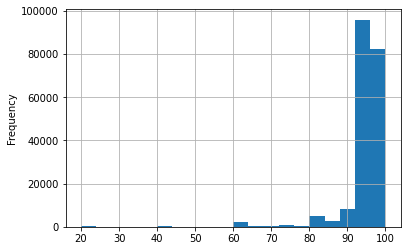

In [ ]:
# For classification purpose, we transfer numerical y to various groups of prices

# First we can have a look to the prices in a histogram
import matplotlib.pyplot as plt
%matplotlib inline

y.plot.hist(grid=True, bins=20) # but it seems like the prices is very imbalanced, there are a few outliers

In [ ]:
# We then assgin the value to ranges based on the description

y[(y<94)]=0
y[(y<96) & (y>=94)]=1
#y[(y<=97) & (y>94)]=2
y[(y>=96)]=2

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-

([<matplotlib.axis.XTick at 0x7f54ab710590>,
 [Text(0, 0, 'Group1'), Text(0, 0, 'Group2'), Text(0, 0, 'Group3')])

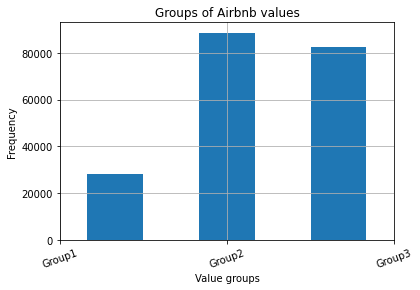

In [ ]:
#y.plot.hist(grid=True, bins=4, rwidth=0.5) 
y.plot.hist(grid=True, bins=3, rwidth=0.5) 
plt.title('Groups of Airbnb values')
plt.xlabel('Value groups')
plt.ylabel('Frequency')
#plt.xticks([0,1,2,3],["Group1", "Group2", "Group3","Group4"], rotation=20)
plt.xticks([0,1,2],["Group1", "Group2", "Group3"], rotation=20)

# Model Preprocessing and PCA Dimension Reduction

In [ ]:
# Normalization 
from sklearn import preprocessing
X_norm = preprocessing.normalize(X)

In [ ]:
# PCA
from sklearn.decomposition import PCA
pca = PCA(10) #temporarily set it to 10, we may change it later

#Transform the data
X_pca = pca.fit_transform(X_norm)
print(pca.explained_variance_ratio_)

[8.36160095e-01 1.62904713e-01 6.10197717e-04 1.08109852e-04
 8.55818362e-05 5.07182023e-05 4.67853073e-05 2.95141948e-05
 1.85900848e-06 1.33121539e-06]


In [ ]:
# Check the shape of the new data
X_pca.shape

(199164, 10)

Text(0.5, 0, 'Number of Component')

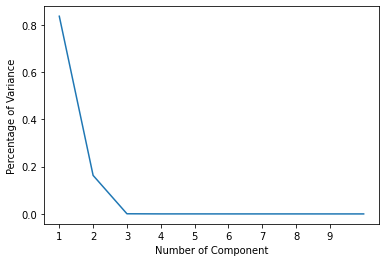

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot([1,2,3,4,5,6,7,8,9,10], pca.explained_variance_ratio_)
plt.ylabel("Percentage of Variance")
plt.xticks(np.arange(1, 10, 1.0))
plt.xlabel("Number of Component")

From the plot that we have, it seems ike 3 PCA components are enough for the prediction. Other components besides the first two do not help much in the data processing.

## Decision tree

In [ ]:
# Decision Tree Model with a pipeline

from sklearn import pipeline
from sklearn import tree
from sklearn import model_selection
from sklearn import metrics

pipe_tree = pipeline.Pipeline(steps=[
           ('scaler', preprocessing.StandardScaler()),
           ('PCA', decomposition.PCA(3, random_state = 42)),
           ('estimator', sklearn.tree.DecisionTreeClassifier(criterion='entropy'))                                   
])
kf = model_selection.KFold(n_splits=5, shuffle=True)
accs = cross_val_score(pipe_tree, X, y, cv=kf)
acc = accs.mean();


NameError: ignored

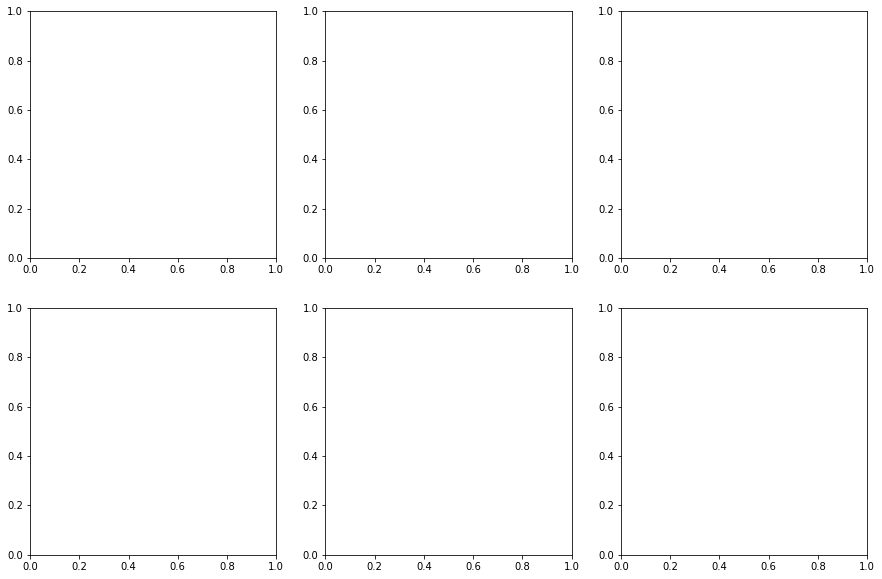

In [ ]:
# Decision Tree Model -- mean is added ****************************************
from sklearn import tree
from sklearn import model_selection
from sklearn import metrics

# Initiate classifier
kf = model_selection.KFold(n_splits=5, shuffle=True)
infoGain_clf = sklearn.tree.DecisionTreeClassifier(criterion='entropy')
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

sum_precision = 0
sum_recall = 0
sum_f1 = 0

for (train_index, test_index), ax in zip(kf.split(X_pca), axes.flatten()):
    X_train, X_test = X_pca[train_index], X_pca[test_index]
    y_train, y_test = y[train_index], y[test_index]
    infoGain_clf .fit(X_train, y_train)
    predicted = infoGain_clf .predict(X_test)
    sum_precision += metrics.precision_score(y_test, predicted, average='weighted')
    sum_recall += metrics.recall_score(y_test, predicted, average='weighted')
    sum_f1 += metrics.f1_score(y_test, predicted, average='weighted')
    #print(metrics.classification_report(y_test, predicted))
    metrics.plot_confusion_matrix(infoGain_clf, X_test, y_test, ax=ax)
    # metrics.plot_confusion_matrix(infoGain_clf, X_test, y_test).ax_.grid(False)
axes[1][2].set_visible(False)
print("")
print("average precision: " + str(sum_precision/5))
print("average recall: " + str(sum_recall/5))
print("average f1-score: " + str(sum_f1/5))
plt.tight_layout()  
plt.show()

## Naive Bayes

In [ ]:
# Naive Bayes Model
from sklearn import naive_bayes
from sklearn.naive_bayes import GaussianNB

# Initiate classifier
kf = model_selection.KFold(n_splits=5, shuffle=True)
gaussian_clf = GaussianNB()
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

sum_precision = 0
sum_recall = 0
sum_f1 = 0

for (train_index, test_index), ax in zip(kf.split(X_pca), axes.flatten()):
    X_train, X_test = X_pca[train_index], X_pca[test_index]
    y_train, y_test = y[train_index], y[test_index]
    gaussian_clf.fit(X_train, y_train)
    predicted = gaussian_clf.predict(X_test)
    sum_precision += metrics.precision_score(y_test, predicted, average='weighted')
    sum_recall += metrics.recall_score(y_test, predicted, average='weighted')
    sum_f1 += metrics.f1_score(y_test, predicted, average='weighted')
    # print(metrics.classification_report(y_test, predicted))
    metrics.plot_confusion_matrix(infoGain_clf, X_test, y_test, ax=ax)
    # metrics.plot_confusion_matrix(infoGain_clf, X_test, y_test).ax_.grid(False)
axes[1][2].set_visible(False)

print("")
print("average precision: " + str(sum_precision/5))
print("average recall: " + str(sum_recall/5))
print("average f1-score: " + str(sum_f1/5))

plt.tight_layout()  
plt.show()


## KNN

In [ ]:
#KNN
from sklearn import neighbors

knn_class = neighbors.KNeighborsClassifier(n_neighbors=1, weights='uniform')
kf = model_selection.KFold(n_splits=5, shuffle=True)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

sum_precision = 0
sum_recall = 0
sum_f1 = 0


for (train_index, test_index), ax in zip(kf.split(X_pca), axes.flatten()):
    X_train, X_test = X_pca[train_index], X_pca[test_index]
    y_train, y_test = y[train_index], y[test_index]
    knn_class.fit(X_train, y_train)
    predicted = knn_class.predict(X_test)
#     print(metrics.confusion_matrix(y_test, predicted))
#     print(metrics.classification_report(y_test, predicted))
    sum_precision += metrics.precision_score(y_test, predicted, average='weighted')
    sum_recall += metrics.recall_score(y_test, predicted, average='weighted')
    sum_f1 += metrics.f1_score(y_test, predicted, average='weighted')
    metrics.plot_confusion_matrix(knn_class, X_test, y_test, ax=ax)
axes[1][2].set_visible(False)

print("")
print("Mean Squared Error: %.2f"
      % np.mean((knn_class.predict(X_test) - y_test) ** 2))
print('R^2: %.2f' % knn_class.score(X_test, y_test))
print("average precision: " + str(sum_precision/5))
print("average recall: " + str(sum_recall/5))
print("average f1-score: " + str(sum_f1/5))

plt.tight_layout()  
plt.show()

## Random Forest

In [ ]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

randomForest = RandomForestClassifier(max_depth=50, random_state=0)
kf = model_selection.KFold(n_splits=5, shuffle=True)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

sum_precision = 0
sum_recall = 0
sum_f1 = 0

for (train_index, test_index), ax in zip(kf.split(X_pca), axes.flatten()):
    X_train, X_test = X_pca[train_index], X_pca[test_index]
    y_train, y_test = y[train_index], y[test_index]
    randomForest.fit(X_train, y_train)
    predicted = randomForest.predict(X_test)
#     print(metrics.confusion_matrix(y_test, predicted))
#     print(metrics.classification_report(y_test, predicted))
    sum_precision += metrics.precision_score(y_test, predicted, average='weighted')
    sum_recall += metrics.recall_score(y_test, predicted, average='weighted')
    sum_f1 += metrics.f1_score(y_test, predicted, average='weighted')
    metrics.plot_confusion_matrix(randomForest, X_test, y_test,ax=ax)
axes[1][2].set_visible(False)

print("")
print("average precision: " + str(sum_precision/5))
print("average recall: " + str(sum_recall/5))
print("average f1-score: " + str(sum_f1/5))

plt.tight_layout()  
plt.show()

## SVM

In [ ]:
from sklearn import svm

svm_classifiser = svm.SVC()
kf = model_selection.KFold(n_splits=5, shuffle=True)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

sum_precision = 0
sum_recall = 0
sum_f1 = 0

for (train_index, test_index), ax in zip(kf.split(X_pca), axes.flatten()):
    X_train, X_test = X_pca[train_index], X_pca[test_index]
    y_train, y_test = y[train_index], y[test_index]
    svm_classifiser.fit(X_train, y_train)
    predicted = svm_classifiser.predict(X_test)
#     print(metrics.confusion_matrix(y_test, predicted))
#     print(metrics.classification_report(y_test, predicted))
    sum_precision += metrics.precision_score(y_test, predicted, average='weighted')
    sum_recall += metrics.recall_score(y_test, predicted, average='weighted')
    sum_f1 += metrics.f1_score(y_test, predicted, average='weighted')
    metrics.plot_confusion_matrix(svm_classifiser, X_test, y_test,ax=ax)
    
axes[1][2].set_visible(False)

print("")
print("average precision: " + str(sum_precision/5))
print("average recall: " + str(sum_recall/5))
print("average f1-score: " + str(sum_f1/5))

plt.tight_layout()  
plt.show()